
# T5_Map_of_Science_Deber

Stefani Juleidy Cartagena Aragón

*17/02/2022*

# Basado en las sesiones de Visualización de datos y Expresiones resulares. Realice una adaptación de la solución del MAP OF SCIENCE. Se requiere dos adaptaciones para resolver esta actividad:

- Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,

- Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA).

- Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla      Ubicación Geográfica de Países - Google Developer. 

- Así como en la solución de referencia se señalan varias ciudades seleccionadas de USA, en su resolución   señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.  

# Cargue su cuaderno de Jupyter en GitHub, asegurandose de lo siguiente:

- en el documento se puede ver con claridad el Mapa de Ciencia de su tema de interés.

- la figura tiene etiquetas adecuadas en los ejes de la visualización. 

- se tiene al menos tres controles de la versión (3 commit con mensajes adecuados sobre la versión)

In [1]:
# Librerías

import re
import csv
import pandas as pd
import matplotlib.pyplot as pltb
import itertools

In [2]:
#abrimos el archivo de pubmed
with open('pubmed-covidnetwo-set.txt',"r", encoding='utf-8-sig') as f:
    data = f.read()
#delimitamos con \n\s(para un espacio) {6} (con 6 repeticiones)     
data = re.sub(r'\n\s{6}',' ', data) 
print(data[:2000])

PMID- 33169132
OWN - NLM
STAT- MEDLINE
DCOM- 20210414
LR  - 20210414
IS  - 1477-4054 (Electronic)
IS  - 1467-5463 (Print)
IS  - 1467-5463 (Linking)
VI  - 22
IP  - 2
DP  - 2021 Mar 22
TI  - Network Pharmacology and bioinformatics analyses identify intersection genes of  niacin and COVID-19 as potential therapeutic targets.
PG  - 1279-1290
LID - 10.1093/bib/bbaa300 [doi]
LID - bbaa300
AB  - OBJECTIVES: Patients with colorectal cancer (CRC) may be susceptible to the  coronavirus disease-2019 (COVID-19). However, anti-CRC/COVID-19 treatment options  are currently unavailable. Since niacin is a vitamin with cytoprotective and  anti-inflammatory functions, this study aimed to evaluate the possible functional  roles and underlying mechanisms of action of niacin as an anti-COVID-19 and -CRC  therapy. INTERVENTIONS: We used a series of network pharmacology-based and  computational analyses to understand and characterize the binding capacity,  biological functions, pharmacological targets and th

In [3]:
paises = re.findall (r"\,\s[A-Z]+[A-z]{2,11}\.", data)
#se delimita otra vez con (r"\,\s[A-Z]+[A-z]{2,11}\." que nos dice que tomando una coma, un espacio que inicie con mayusculas de la A a la Z con otra mayuscula y una minuscula que tenga un rango de 2 a 11 
print (paises[:100])

[', Canada.', ', Canada.', ', India.', ', India.', ', USA.', ', India.', ', India.', ', India.', ', India.', ', India.', ', USA.', ', India.', ', India.', ', India.', ', India.', ', India.', ', Israel.', ', Israel.', ', Israel.', ', Israel.', ', Israel.', ', Israel.', ', Israel.', ', Budapest.', ', China.', ', China.', ', China.', ', China.', ', Japan.', ', Canada.', ', USA.', ', Germany.', ', Canada.', ', Canada.', ', China.', ', Germany.', ', Germany.', ', Germany.', ', India.', ', Germany.', ', USA.', ', Germany.', ', Germany.', ', Iran.', ', Iran.', ', Iran.', ', Iran.', ', Iran.', ', Slovenia.', ', Slovenia.', ', Slovenia.', ', Thailand.', ', India.', ', Iran.', ', Spain.', ', Iran.', ', Iran.', ', Iran.', ', USA.', ', USA.', ', Qatar.', ', Qatar.', ', Qatar.', ', Qatar.', ', Qatar.', ', Qatar.', ', Romania.', ', Finland.', ', Spain.', ', Romania.', ', Romania.', ', Romania.', ', Romania.', ', Finland.', ', Romania.', ', Romania.', ', Romania.', ', Romania.', ', Romania.', ', Roma

In [4]:
unique_text =list(set(paises))
#se tranforma en una lista
unique_text.sort()
#se ordena y se elimina los que se repiten 
unico = unique_text
print(unico)

[', ACT.', ', AMBA.', ', ARG.', ', AUSTRALIA.', ', AbbVie.', ', Abbvie.', ', Abt.', ', Achterstr.', ', Adj.', ', Advisory.', ', Afghanistan.', ', Ala.', ', Alabama.', ', Alaska.', ', Alb.', ', Albacete.', ', Albania.', ', Albany.', ', Alberta.', ', Albrechtstr.', ', Algeria.', ', Alicante.', ', Alta.', ', Amgen.', ', Amman.', ', Ancona.', ', Andorra.', ', Aosta.', ', Apdo.', ', Aranjuez.', ', Ardeystr.', ', Argentina.', ', Arizona.', ', Arkansas.', ', Armenia.', ', Aspen.', ', Aspenhausstr.', ', Assam.', ', Assiut.', ', Atlanta.', ', Atlas.', ', Auckland.', ', Augusta.', ', Aurora.', ', Australia.', ', Austria.', ', Avda.', ', Ave.', ', Aydin.', ', Azerbaijan.', ', BCNatal.', ', BMS.', ', BRB.', ', Badalona.', ', Bahnhofstr.', ', Bahrain.', ', Baltimore.', ', Bangkok.', ', Bangladesh.', ', Bangor.', ', Banngladesh.', ', Barbarastr.', ', Barcelona.', ', Bari.', ', Basel.', ', Basilea.', ', Beijing.', ', Belarus.', ', Belgique.', ', Belgium.', ', Beltz.', ', Benevento.', ', Benin.', ', B

In [5]:
b = unique_text
#se eliman las caracteristicas que no son los que queremos 

b.remove(', ACT.')
b.remove(', AMBA.')
b.remove(', ARG.') 
b.remove(', AUSTRALIA.') 
b.remove(', AbbVie.')
b.remove(', Abbvie.')
b.remove(', Abt.')
b.remove(', Achterstr.') 
b.remove(', Adj.')
b.remove(', Advisory.')
b.remove(', Afghanistan.')
b.remove(', Ala.')
b.remove(', Alabama.')
b.remove(', Alaska.')
b.remove(', Alb.')
b.remove(', Albacete.') 
b.remove(', Albania.')
b.remove(', Albany.')
b.remove(', Alberta.') 
b.remove(', Albrechtstr.')
b.remove(', Algeria.')
b.remove(', Alicante.') 
b.remove(', Alta.')
b.remove(', Amgen.')
b.remove(', Amman.')
b.remove(', Ancona.')
b.remove(', Andorra.')
b.remove(', Aosta.')
b.remove(', Apdo.')
b.remove(', Aranjuez.')
b.remove(', Ardeystr.')
b.remove(', Argentina.') 
b.remove(', Arizona.')
b.remove(', Arkansas.') 
b.remove(', Armenia.')
b.remove(', Aspen.')
b.remove(', Aspenhausstr.')
b.remove(', Assam.')
b.remove(', Assiut.') 
b.remove(', Atlanta.')
b.remove(', Atlas.')
b.remove(', Auckland.')
b.remove(', Augusta.')
b.remove(', Aurora.')
b.remove(', Austria.') 
b.remove(', Avda.')
b.remove(', Ave.')
b.remove(', Aydin.')
b.remove(', Azerbaijan.')
b.remove(', BCNatal.')
b.remove(', BMS.')
b.remove(', BRB.')
b.remove(', Badalona.')
b.remove(', Bahnhofstr.')
b.remove(', Bahrain.')
b.remove(', Baltimore.')
b.remove(', Bangkok.')
b.remove(', Bangladesh.')
b.remove(', Bangor.')
b.remove(', Banngladesh.')
b.remove(', Barbarastr.')
b.remove(', Barcelona.')
b.remove(', Bari.')
b.remove(', Basel.') 
b.remove(', Basilea.')
b.remove(', Beijing.')
b.remove(', Belarus.') 
b.remove(', Belgique.')
b.remove(', Belgium.')
b.remove(', Beltz.')
b.remove(', Benevento.') 
b.remove(', Benin.')
b.remove(', Bergamo.') 
b.remove(', Bergen.')
b.remove(', Berkeley.') 
b.remove(', Biol.')
b.remove(', Biomerieux.') 
b.remove(', Birmingham.')
b.remove(', Bld.')
b.remove(', Bleichstr.') 
b.remove(', Bloomington.') 
b.remove(', Blvd.')
b.remove(', Bojnurd.') 
b.remove(', Bolivia.')
b.remove(', Bologna.')
b.remove(', Bolzano.')
b.remove(', Bordeaux.') 
b.remove(', Boston.')
b.remove(', Botswana.') 
b.remove(', Brazill.') 
b.remove(', Bremen.')
b.remove(', Brescia.') 
b.remove(', Bronx.')
b.remove(', Brussels.') 
b.remove(', Budapest.')
b.remove(', Budapest].')
b.remove(', Budapesten.') 
b.remove(', Bulgaria.')
b.remove(', Burlington.') 
b.remove(', Burundi.')
b.remove(', CABA.')
b.remove(', CAN.')
b.remove(', CANADA.') 
b.remove(', CAS.')
b.remove(', CCSS.') 
b.remove(', CHL.')
b.remove(', CIBERCV.') 
b.remove(', CIHR.')
b.remove(', COL.')
b.remove(', Cagliari.') 
b.remove(', Cairo.')
b.remove(', Calif.')
b.remove(', California.') 
b.remove(', Cambodia.')
b.remove(', Cambridge.') 
b.remove(', Cameroon.')
b.remove(', Cameroun.')
b.remove(', Campobasso.') 
b.remove(', Canada.')
b.remove(', Cananda.') 
b.remove(', Canda.')
b.remove(', Capricare.')
b.remove(', Catalonia.')
b.remove(', Catania.')
b.remove(', Centro.')
b.remove(', Cervo.')
b.remove(', Charleston.') 
b.remove(', Chennai.')
b.remove(', Chicago.')
b.remove(', Chiesi.')
b.remove(', ChietiItaly.') 
b.remove(', Chile.')
b.remove(', Christchurch.') 
b.remove(', Col.')
b.remove(', Colombia.') 
b.remove(', Colorado.')
b.remove(', Columbia.')
b.remove(', Columbus.')
b.remove(', Congo.')
b.remove(', Conn.')
b.remove(', Connecticut.') 
b.remove(', Covasim.')
b.remove(', Coventry.') 
b.remove(', Cra.')
b.remove(', Crawley.') 
b.remove(', Creatinine.') 
b.remove(', Crema.')
b.remove(', Cremona.')
b.remove(', Croatia.')
b.remove(', Ctra.')
b.remove(', Cuajimalpa.')
b.remove( ', Cuba.')
b.remove(', Cuenca.') 
b.remove(', Cumberland.') 
b.remove(', Cyprus.')
b.remove(', Czechia.') 
b.remove(', DEU.')
b.remove(', Dallas.') 
b.remove(', Del.')
b.remove(', Delaware.') 
b.remove(', Denmark.')
b.remove(', Denver.')
b.remove(', Dept.')
b.remove(', Detroit.') 
b.remove(', Deutsch.')
b.remove(', Deutschalnd.') 
b.remove(', Deutschland.')
b.remove(', Distt.')
b.remove(', Djibouti.') 
b.remove(', Doxy.')
b.remove(', Duarte.') 
b.remove(', Duluth.')
b.remove(', Dunedin.') 
b.remove(', EAACI.')
b.remove(', EDRD.')
b.remove(', EGY.')
b.remove(', EHRA.') 
b.remove(', ESP.')
b.remove(', ETH.')
b.remove(', EUA.')
b.remove(', Ecuador.') 
b.remove(', Edo.')
b.remove(', Egypt.') 
b.remove(', Email.')
b.remove(', England.') 
b.remove(', Equinox.')
b.remove(', Eritrea.')
b.remove(', Espanha.')
b.remove(', Estonia.')
b.remove(', Eswatini.') 
b.remove(', Ethiopia.')
b.remove(', Europe.')
b.remove(', Fac.')
b.remove(', Faisalabad.') 
b.remove(', Fermo.')
b.remove(', Ferrara.') 
b.remove(', Fiji.')
b.remove(', Finland.') 
b.remove(', Fiocruz.')
b.remove(', Firenze.')
b.remove(', Fla.')
b.remove(', Florence.') 
b.remove(', Florida.')
b.remove(', Foggia.')
b.remove(', France.')
b.remove(', Francesco.') 
b.remove(', GBR.')
b.remove(', GRD.')
b.remove(', GSK.')
b.remove(', GVN.')
b.remove(', Gabon.') 
b.remove(', Galveston.') 
b.remove(', Gambia.')
b.remove(', Gen.')
b.remove(', Geneva.') 
b.remove(', Genoa.')
b.remove(', Genova.') 
b.remove(', Georgia.') 
b.remove(', Germany.')
b.remove(', Ghana.')
b.remove(', Gibraltar.') 
b.remove(', Girona.')
b.remove(', Glenmark.') 
b.remove(', Goebenstr.') 
b.remove(', Google.')
b.remove(', Gossamer.') 
b.remove(', Govt.')
b.remove(', Greece.') 
b.remove(', Groningen.') 
b.remove(', Guam.')
b.remove(', Guatemala.') 
b.remove(', Guinea.')
b.remove(', HUN.')
b.remove(', Hamilton.') 
b.remove(', Harrisburg.') 
b.remove(', Hartford.')
b.remove(', Hawaii.')
b.remove(', Helmholtzstr.') 
b.remove(', Hon.')
b.remove(', Honduras.') 
b.remove(', Hongkong.')
b.remove(', Hornet.')
b.remove(', Hosp.')
b.remove(', Houston.') 
b.remove(', Huelva.')
b.remove(', Hungary.')
b.remove(', Hyderabad.') 
b.remove(', IBS.')
b.remove(', III.')
b.remove(', IND.')
b.remove(', INDIA.') 
b.remove(', IRN.')
b.remove(', ISCIII.') 
b.remove(', Iceland.') 
b.remove(', Ill.')
b.remove(', Illinois.')
b.remove(', Imperia.') 
b.remove(', Inc.')
b.remove(', Ind.')
b.remove(', India.') 
b.remove(', Indiana.')
b.remove(', Indianapolis.') 
b.remove(', Indonesia.')
b.remove(', Ine.')
b.remove(', Inida.')
b.remove(', Int.')
b.remove(', Iowa.') 
b.remove(', Iran.')
b.remove(', Iraq.')
b.remove(', Ireland.')
b.remove(', Irvine.')
b.remove(', Israel.')
b.remove(', Italia.')
b.remove(', Italy.')
b.remove(', JAMA.')
b.remove(', Jaipur.') 
b.remove(', Jamaica.') 
b.remove(', Jan.')
b.remove(', Janssen.') 
b.remove(', Japan.')
b.remove(', Jeddah.') 
b.remove(', Jilin.')
b.remove(', Jinan.')
b.remove(', Jordan.') 
b.remove(', KOR.')
b.remove(', Kansas.') 
b.remove(', Kaohsiung.') 
b.remove(', Karachi.')
b.remove(', Karnataka.')
b.remove(', Kashmir.')
b.remove(', Kathmandu.')
b.remove(', Kazakhstan.') 
b.remove(', Kazakstan.')
b.remove(', Kentucky.')
b.remove(', Kenya.')
b.remove(', Kgs.')
b.remove(', Kinshasa.') 
b.remove(', Kolkata.')
b.remove(', Korea.')
b.remove(', Kuwait.')
b.remove(', Kyrgyzstan.') 
b.remove(', LBN.')
b.remove(', LLC.')
b.remove(', LTD.')
b.remove(', Lansing.') 
b.remove(', Laos.')
b.remove(', Latvia.')
b.remove(', Lebanon.')
b.remove(', Lecce.')
b.remove(', Lecco.')
b.remove(', Leicester.') 
b.remove(', Leiden.')
b.remove(', Lesotho.') 
b.remove(', Leuven.')
b.remove(', Liberia.') 
b.remove(', Libya.')
b.remove(', Lithuania.') 
b.remove(', Livanova.')
b.remove(', Liverpool.') 
b.remove(', London.')
b.remove(', Louisiana.') 
b.remove(', Ltd.')
b.remove(', Lugo.')
b.remove(', Luxembourg.') 
b.remove(', MCRI.')
b.remove(', MPH.')
b.remove(', MSD.')
b.remove(', Maasai.') 
b.remove(', Macao.')
b.remove(', Macau.')
b.remove(', Macedonia.')
b.remove(', Madagascar.')
b.remove(', Madison.')
b.remove(', Madrid.')
b.remove(', Malawi.')
b.remove(', Malaysia.')
b.remove(', Maldives.') 
b.remove(', Mali.')
b.remove(', Malta.') 
b.remove(', Man.')
b.remove(', Manguinhos.') 
b.remove(', Manipal.')
b.remove(', Manitoba.') 
b.remove(', Mar.')
b.remove(', Maroc.')
b.remove(', Martinistr.') 
b.remove(', Maryland.')
b.remove(', Mass.')
b.remove(', Mauritius.') 
b.remove(', Maximus.')
b.remove(', Medrxiv.')
b.remove(', Medtronic.') 
b.remove(', Merck.')
b.remove(', Mexico.') 
b.remove(', Miami.')
b.remove(', Mich.')
b.remove(', Michigan.') 
b.remove(', Milan.')
b.remove(', Milano.')
b.remove(', Minn.')
b.remove(', Minneapolis.') 
b.remove(', Minnesota.')
b.remove(', Mississippi.') 
b.remove(', Missouri.')
b.remove(', Moldova.') 
b.remove(', Monaco.')
b.remove(', Mongolia.') 
b.remove(', Montana.')
b.remove(', Montenegro.') 
b.remove(', Monza.')
b.remove(', Morocco.') 
b.remove(', Moscow.')
b.remove(', Mozambique.') 
b.remove(', Mumbai.')
b.remove(', Murcia.')
b.remove(', MyFreeDoctor.')
b.remove(', Myanmar.') 
b.remove(', Mylan.')
b.remove(', NIH.')
b.remove(', NOR.')
b.remove(', NSW.')
b.remove(', NYC.')
b.remove(', Namibia.')
b.remove(', Naples.')
b.remove(', Napoli.')
b.remove(', Nat.')
b.remove(', Neaples.')
b.remove(', Neath.')
b.remove(', Nebraska.')
b.remove(', Nederland.')
b.remove(', Nepal.')
b.remove(', Netherlands.')
b.remove(', Neurology.') 
b.remove(', Newark.')
b.remove(', Newmarket.')
b.remove(', Nfld.')
b.remove(', Nicaragua.')
b.remove(', Niger.')
b.remove(', Nigeria.')
b.remove(', Norway.')
b.remove(', Notkestr.')
b.remove(', Nottingham.')
b.remove(', Novara.')
b.remove(', Novartis.')
b.remove(', Nukute.')
b.remove(', OUH.')
b.remove(', Oakland.')
b.remove(', Ohio.')
b.remove(', Oman.')
b.remove(', Onpattro.')
b.remove(', Ont.')
b.remove(', Ontario.')
b.remove(', Oregon.')
b.remove(', Oslo.')
b.remove(', Oviedo.')
b.remove(', Oxford.')
b.remove(', PAK.')
b.remove(', PSNSU.')
b.remove(', Padua.')
b.remove(', Pakistan.')
b.remove(', Palau.')
b.remove(', Palermo.')
b.remove(', Palestine.')
b.remove(', Palma.')
b.remove(', Panama.')
b.remove(', Papua.')
b.remove(', Paraguay.')
b.remove(', Paris.')
b.remove(', Parla.')
b.remove(', Parma.')
b.remove(', Pauwelsstr.')
b.remove(', Pennsylvania.')
b.remove(', Peru.')
b.remove(', Perugia.')
b.remove(', Pfizer.') 
b.remove(', PhD.')
b.remove(', Philadelphia.')
b.remove(', Philippine.')
b.remove(', Philippines.')
b.remove(', Piacenza.')
b.remove(', PierreFabre.') 
b.remove(', Pisa.')
b.remove(', Pistoia.')
b.remove(', Playa.')
b.remove(', Poland.')
b.remove(', Portland.')
b.remove(', Portugal.')
b.remove(', Potenza.')
b.remove(', Prague.')
b.remove(', Prof.')
b.remove(', Providence.')
b.remove(', PubMed.')
b.remove(', Pune.')
b.remove(', Pushkala.')
b.remove(', Pvt.')
b.remove(', Pza.')
b.remove(', QLD.')
b.remove(', Qaen.')
b.remove(', Qatar.')
b.remove(', Qena.')
b.remove(', Qld.')
b.remove(', Qro.')
b.remove(', Que.')
b.remove(', Queensland.')
b.remove(', REACTing.')
b.remove(', ROC.')
b.remove(', ROU.')
b.remove(', RUS.')
b.remove(', Radiology.')
b.remove(', Raleigh.')
b.remove(', Reddit.')
b.remove(', Regensburg.')
b.remove(', Remdesivir.')
b.remove(', Rempartstr.')
b.remove(', Rieti.')
b.remove(', Rimini.')
b.remove(', Riverview.')
b.remove(', Roche.')
b.remove(', Roma.')
b.remove(', Romania.')
b.remove(', Rome.')
b.remove(', Rovigo.')
b.remove(', Russia.')
b.remove(', Rwanda.')
b.remove(', SAU.')
b.remove(', SXM.')
b.remove(', Sacramento.')
b.remove(', Salerno.')
b.remove(', Salford.')
b.remove(', Sanofi.')
b.remove(', Santander.') 
b.remove(', Sask.')
b.remove(', Sassari.') 
b.remove(', Savar.')
b.remove(', Scarborough.') 
b.remove(', Scotland.') 
b.remove(', Sdr.')
b.remove(', Seattle.') 
b.remove(', Sec.')
b.remove(', Sect.')
b.remove(', Senegal.')
b.remove(', Serbia.')
b.remove(', Seres.')
b.remove(', Sevilla.')
b.remove(', Shionogi.') 
b.remove(', SiVeUle.')
b.remove(', Sichuan.') 
b.remove(', Siena.')
b.remove(', Singapore.') 
b.remove(', Slovakia.')
b.remove(', Slovenia.') 
b.remove(', Smt.')
b.remove(', Sofia.')
b.remove(', Somal.')
b.remove(', Somalia.') 
b.remove(', Spain.')
b.remove(', Speyer.') 
b.remove(', Srl.')
b.remove(', Staph.')
b.remove(', Steinmetzstr.')
b.remove(', Stenglinstr.') 
b.remove(', Sudan.')
b.remove(', Super.')
b.remove(', Suzhou.')
b.remove(', Sweden.')
b.remove(', SwissEthics.')
b.remove(', Switzerland.') 
b.remove(', Symptoms.')
b.remove(', Syria.')
b.remove(', TEVA.')
b.remove(', TTO.')
b.remove(', Taipei.')
b.remove(', Taiwan.')
b.remove(', Takeda.')
b.remove(', Tanzania.')
b.remove(', Taoyuan.')
b.remove(', Tarragona.')
b.remove(', Tehran.')
b.remove(', Temple.')
b.remove(', Tenerife.')
b.remove(', Tennesee.')
b.remove(', Tennessee.') 
b.remove(', Tex.')
b.remove(', Texas.')
b.remove(', Thailand.') 
b.remove(', Timaru.')
b.remove(', Tiruvalla.') 
b.remove(', Tokyo.')
b.remove(', Tonga.')
b.remove(', Torino.')
b.remove(', Toronto.')
b.remove(', Trento.')
b.remove(', Trenton.')
b.remove(', Treviso.')
b.remove(', Trieste.')
b.remove(', Trindade.') 
b.remove(', Tunis.')
b.remove(', Tunisia.')
b.remove(', Tunisie.') 
b.remove(', Turkey.')
b.remove(', Tuvalu.')
b.remove(', UAE.')
b.remove(', Udine.')
b.remove(', Uganda.')
b.remove(', Ukraine.')
b.remove(', Ulmenstr.')
b.remove(', Univ.')
b.remove(', Urogen.')
b.remove(', Uruguay.')
b.remove(', Utah.')
b.remove(', Uzbekistan.') 
b.remove(', VEN.')
b.remove(', VIC.')
b.remove(', Valencia.')
b.remove(', Valhalla.')
b.remove(', Valladolid.') 
b.remove(', Vancouver.') 
b.remove(', Vanuatu.')
b.remove(', Venezuela.')
b.remove(', Vercelli.')
b.remove(', Vermont.')
b.remove(', Vic.')
b.remove(', Victoria.')
b.remove(', Vietnam.') 
b.remove(', Vigo.')
b.remove(', Virginia.') 
b.remove(', Vol.')
b.remove(', Waldstr.') 
b.remove(', Wales.') 
b.remove(', Wash.')
b.remove(', Washington.') 
b.remove(', Weinheim.')
b.remove(', Wellington.')
b.remove(', Westmead.')
b.remove(', Westwood.')
b.remove(', Wis.')
b.remove(', Wisconsin.') 
b.remove(', Worcester.') 
b.remove(', Wuhan.')
b.remove(', XXX.')
b.remove(', Yemen.')
b.remove(', Zambia.')
b.remove(', Zarqa.')
b.remove(', Ziemssenstr.') 
b.remove(', Zimbabwe.') 
b.remove(', Zogenyx.')
b.remove(',\xa0Brazil.')
b.remove(',\xa0France.')
b.remove(',\u202fSpain.') 

In [6]:
 print() 
    
print('Los paises de interes son: ', b) 


Los paises de interes son:  [', Australia.', ', Brasil.', ', Brazil.', ', China.', ', UKRAINE.', ', USA.']


In [7]:
    c = "".join(b)
    d = c.split(", ")
    e = "".join(d)
    f = e.split(".")
    f.remove("")
    u = f
    print()
    print('La lista final es: ', u) 


La lista final es:  ['Australia', 'Brasil', 'Brazil', 'China', 'UKRAINE', 'USA']


In [8]:
# Datos de excel
datos = pd.read_csv('./countryes_ubication.csv', engine='python', skipfooter=3)
datos.head(10)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [9]:
name = datos[datos.name.isin(u)]
name.head(10)

,country,latitude,longitude,name
13,AU,-25.274398,133.775136,Australia
28,BR,-14.235004,-51.925280,Brazil
45,CN,35.861660,104.195397,China


In [18]:
paises = datos[datos.country.isin(u)]
data =pd.concat([name,paises]).drop_duplicates().sort_values('name')
data.head(25)

,country,latitude,longitude,name
13,AU,-25.274398,133.775136,Australia
28,BR,-14.235004,-51.925280,Brazil
45,CN,35.861660,104.195397,China


In [11]:
# se importa las librerias necesarias

import matplotlib.pyplot as plt

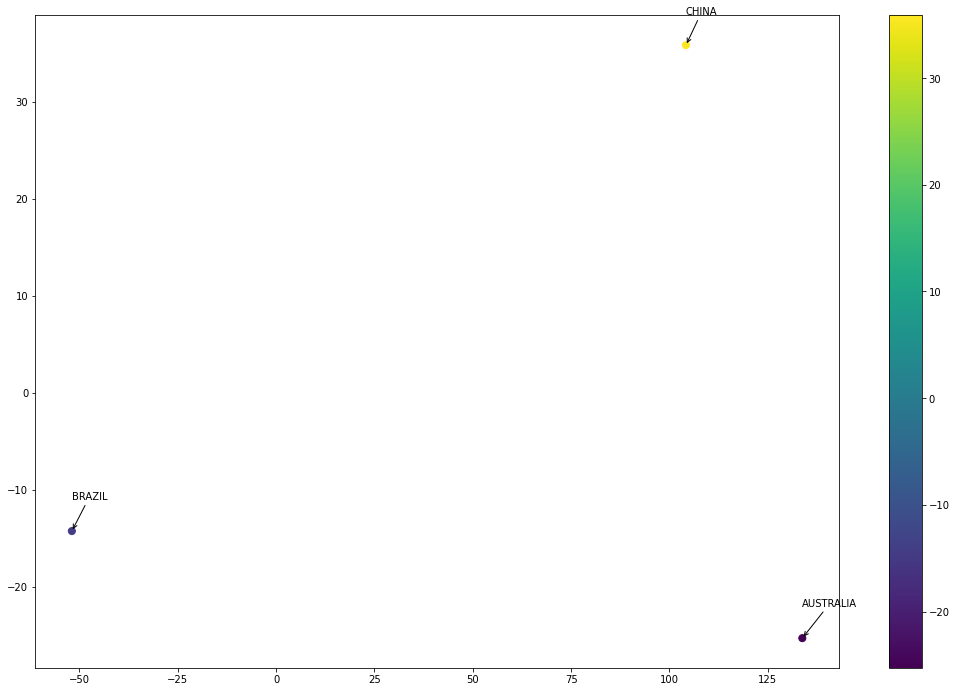

In [23]:

pltb.scatter(data.longitude, data.latitude, s=50, c=data.latitude)
pltb.colorbar()
ard = dict(arrowstyle="->")

plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('UKRAINE', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('NORWAY', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) ) 